# Project Name: Life Expectancy Prediction
The main aim of this project is to predict life expectancy of 193 nations based on various features which we will discuss as we go ahead

## Life Expectancy Prediction- Data Analysis

In [1]:
## Data Analysis Phase
## Main aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_11053289a7554938afa70b39276f5c5d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='veQRGIYum3ENfDNBC7RKsAX4ecpZWMOIGppo2Ub4BYF7',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_11053289a7554938afa70b39276f5c5d.get_object(Bucket='lifeexp-donotdelete-pr-jrohmxh3lnivmo',Key='Life_exp_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.shape

(2938, 22)

## Missing Values

In [4]:
features_with_na =[features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean(),4),'% value missing')

Life expectancy  0.0034 % value missing
Adult Mortality 0.0034 % value missing
Alcohol 0.066 % value missing
Hepatitis B 0.1882 % value missing
 BMI  0.0116 % value missing
Polio 0.0065 % value missing
Total expenditure 0.0769 % value missing
Diphtheria  0.0065 % value missing
GDP 0.1525 % value missing
Population 0.2219 % value missing
 thinness  1-19 years 0.0116 % value missing
 thinness 5-9 years 0.0116 % value missing
Income composition of resources 0.0568 % value missing
Schooling 0.0555 % value missing


### Relationship between missing values and Life Expectancy

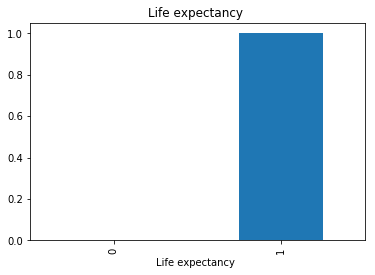

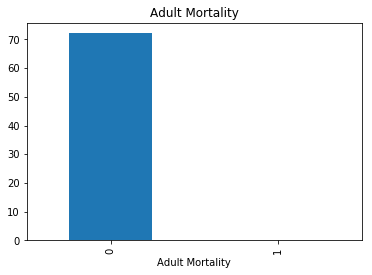

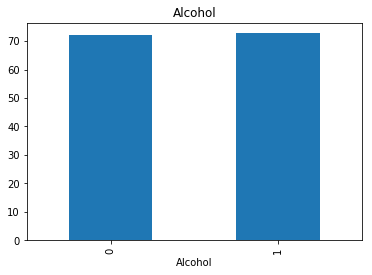

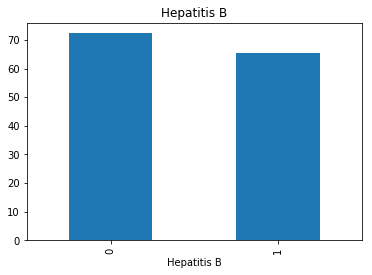

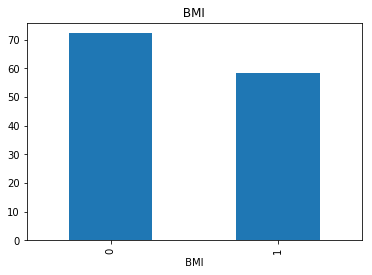

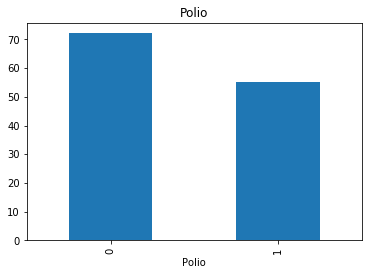

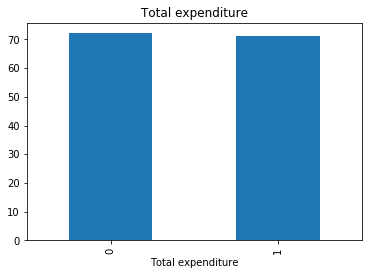

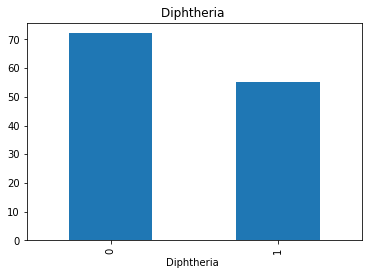

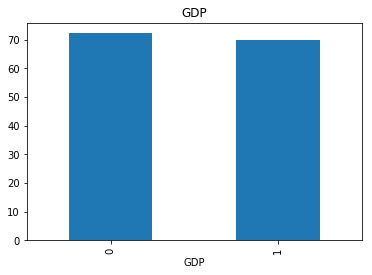

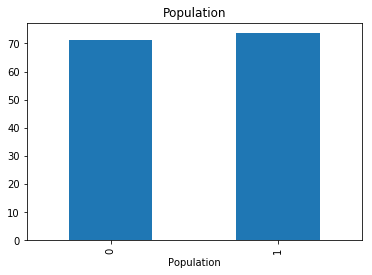

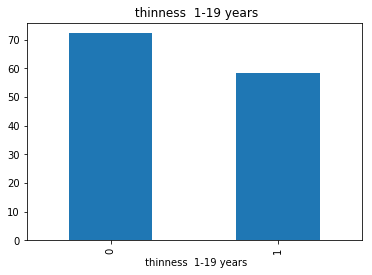

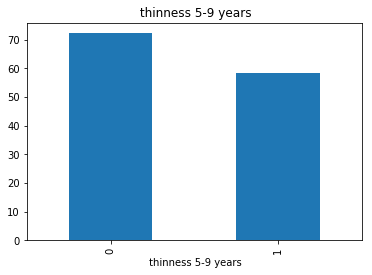

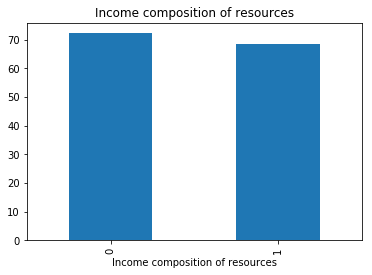

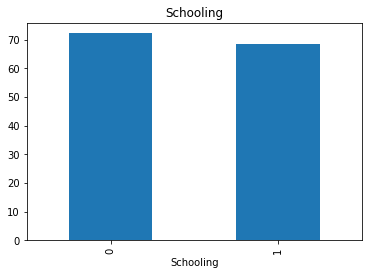

In [5]:
for feature in features_with_na:
    data = df.copy()
    
    data[feature] = np.where(data[feature].isnull(),1,0)
    
    data.groupby(feature)['Life expectancy '].median().plot.bar()
    plt.title(feature)
    plt.show()

Here the relation between the missing values and the dependent variable is clearly visible.

### Numerical Variables

In [6]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  20


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Continuous Variables

In [7]:
continuous_features = [feature for feature in numerical_features if feature!='Year']
print("Continuous feature Count {}".format(len(continuous_features)))
continuous_features

Continuous feature Count 19


['Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

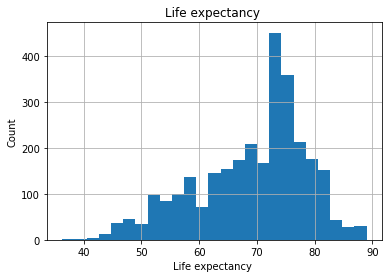

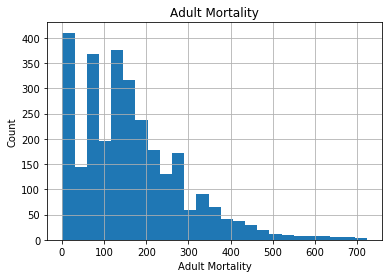

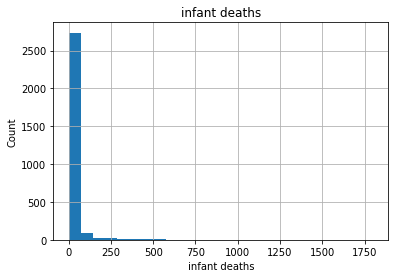

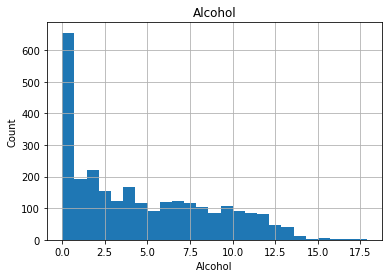

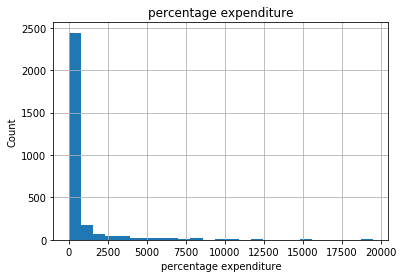

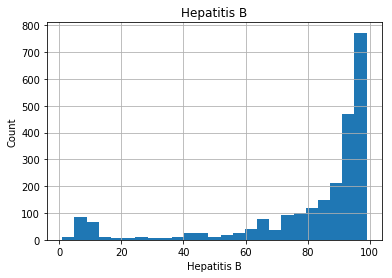

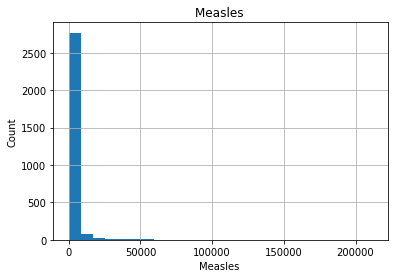

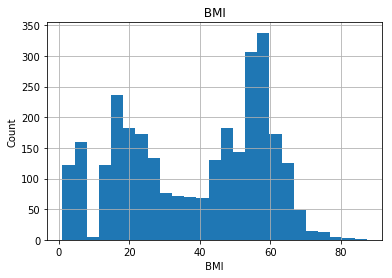

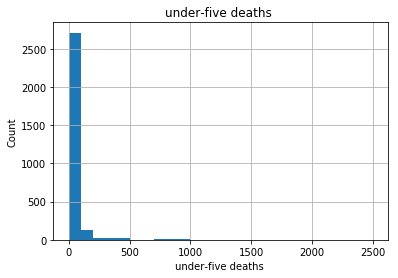

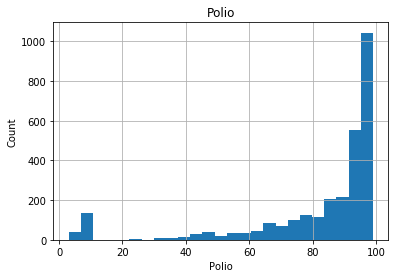

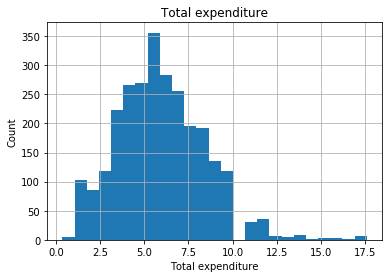

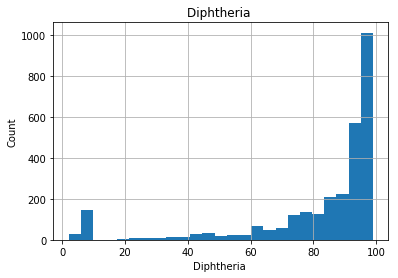

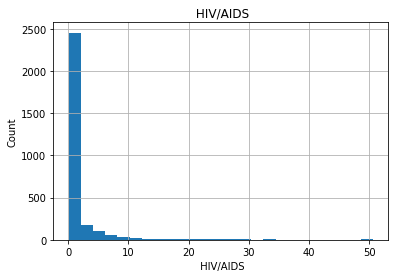

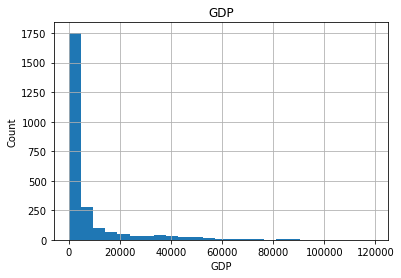

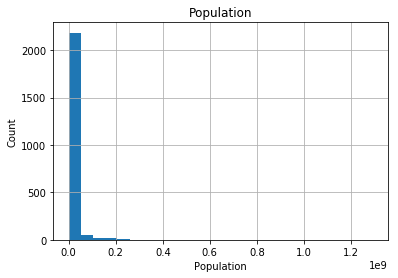

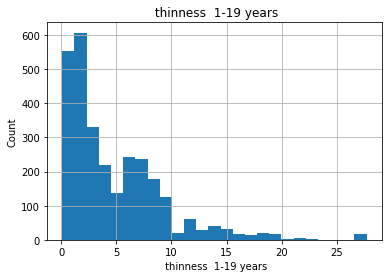

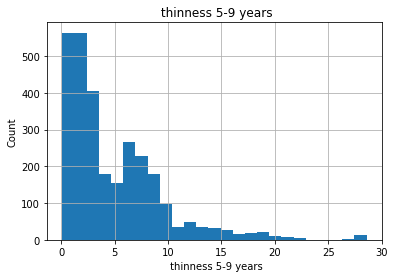

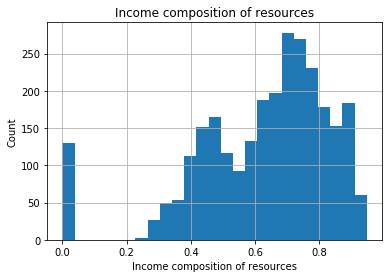

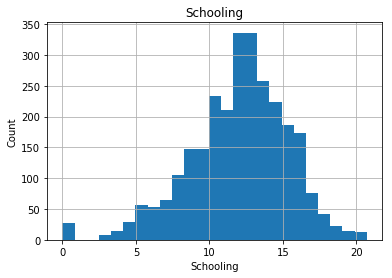

In [8]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_features:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


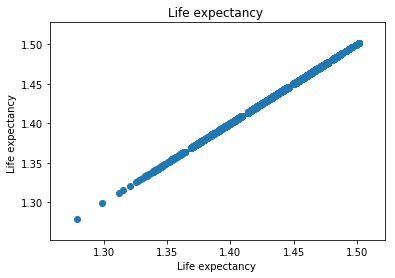

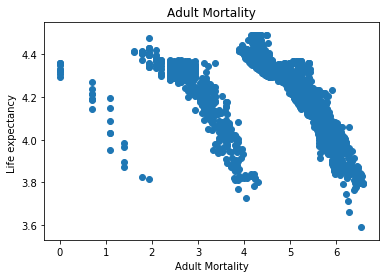

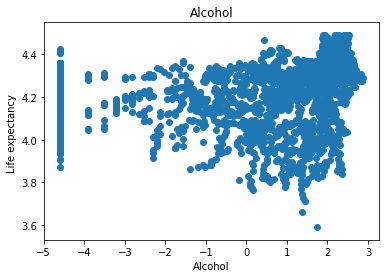

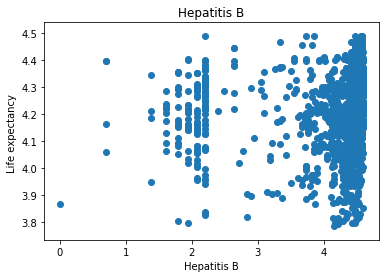

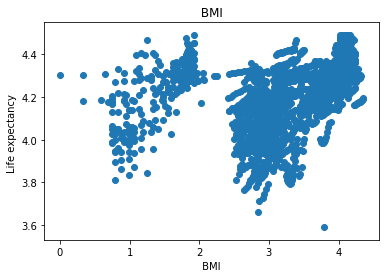

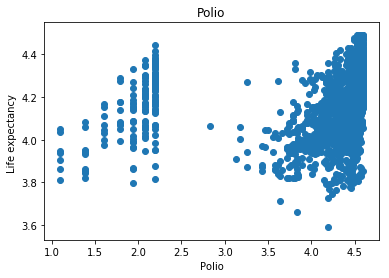

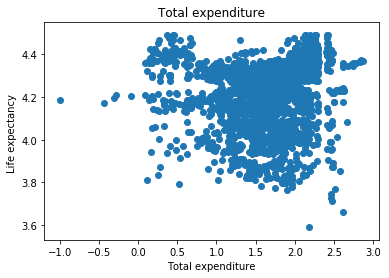

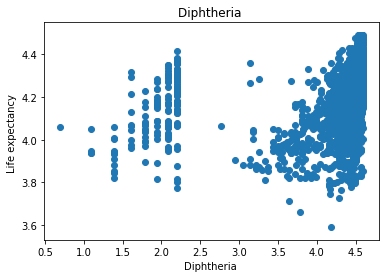

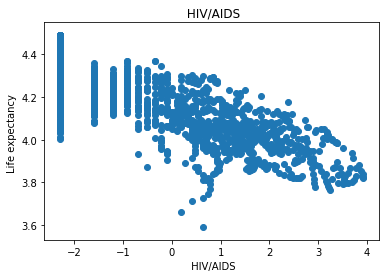

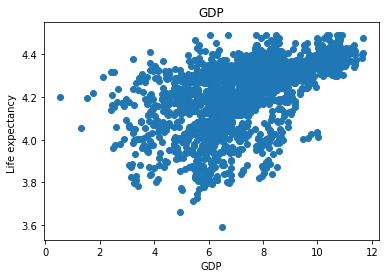

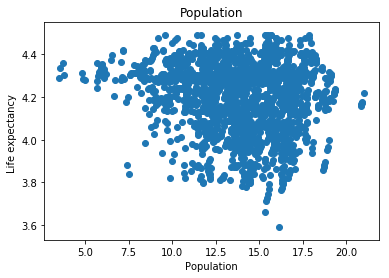

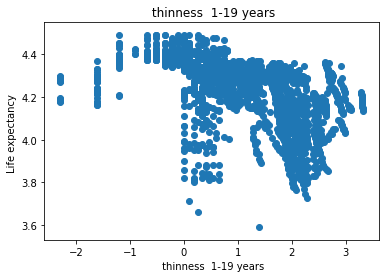

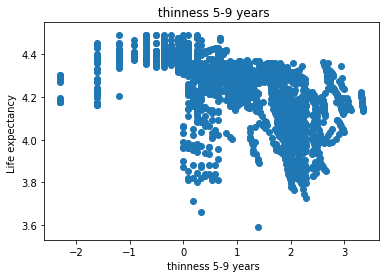

In [9]:
## We will be using logarithmic transformation

for feature in continuous_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Life expectancy ']=np.log(data['Life expectancy '])
        plt.scatter(data[feature],data['Life expectancy '])
        plt.xlabel(feature)
        plt.ylabel('Life expectancy ')
        plt.title(feature)
        plt.show()
        
    

## Outliers

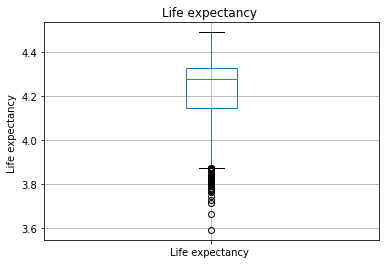

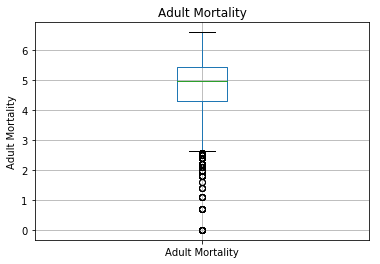

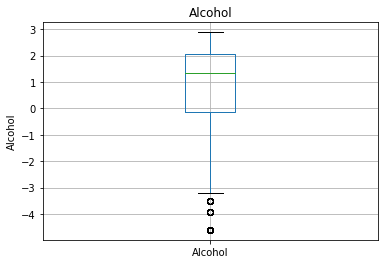

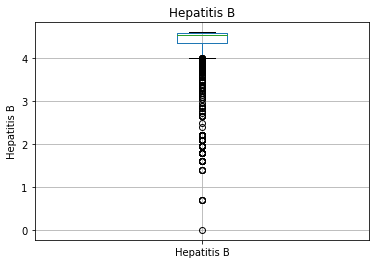

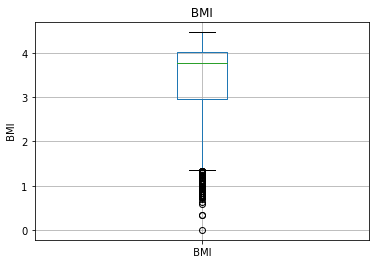

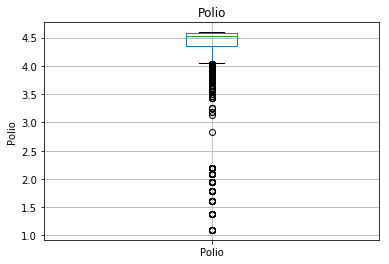

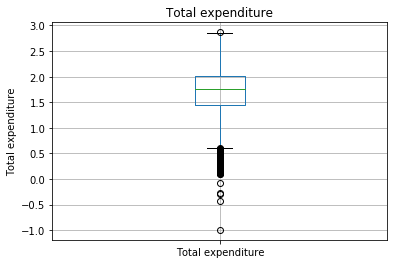

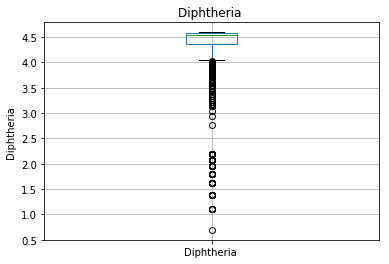

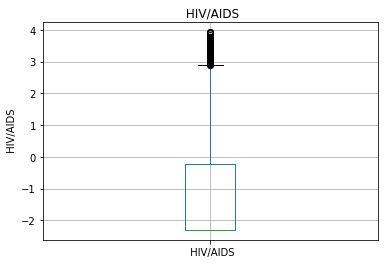

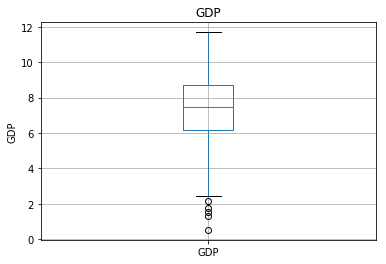

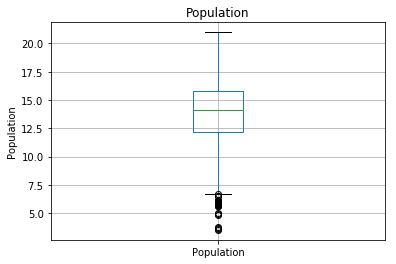

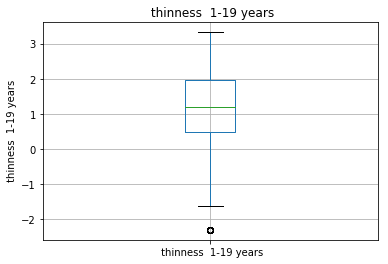

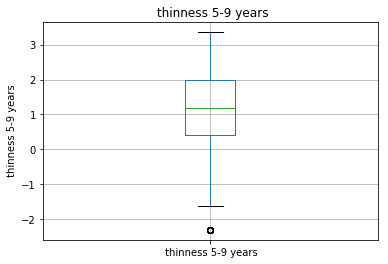

In [10]:
for feature in continuous_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

## Categorical Variables

In [11]:
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
categorical_features

['Country', 'Status']

In [12]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Country and number of categories are 193
The feature is Status and number of categories are 2


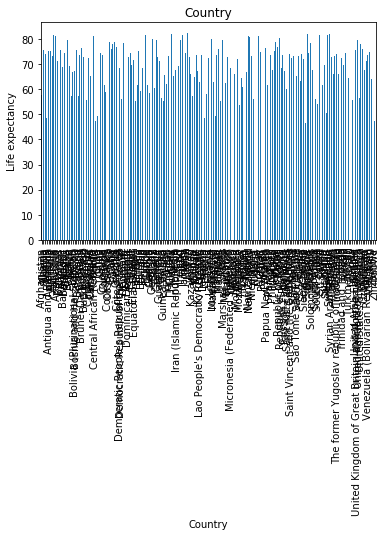

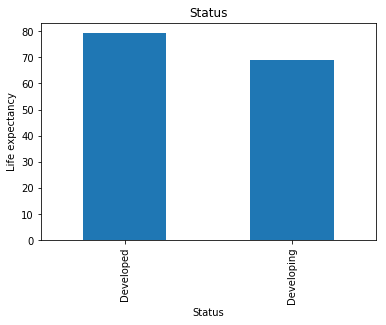

In [13]:
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['Life expectancy '].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Life expectancy')
    plt.title(feature)
    plt.show()